### Choose a dataset to Visulaize
* Import needed libraries 
* Load your dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets

In [2]:
df = pd.read_csv("HR_Missing_Vslues.csv")
df.head()

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
0,"Adinolfi, Wilson K",10026,62506.0,19,Production Technician I,07/10/83,M,Single,White,7/5/2011,NaN,Production,Michael Albert,22.0,LinkedIn,1.0
1,"Ait Sidi, Karthikeyan",10084,104437.0,27,Sr. DBA,05/05/75,M,Married,White,3/30/2015,6/16/2016,IT/IS,Simon Roup,4.0,Indeed,17.0
2,"Akinkuolie, Sarah",10196,64955.0,20,Production Technician II,09/19/88,F,Married,White,7/5/2011,9/24/2012,Production,Kissy Sullivan,20.0,LinkedIn,3.0
3,"Alagbe,Trina",10088,64991.0,19,Production Technician I,NaN,F,Married,White,1/7/2008,NaN,Production,Elijiah Gray,16.0,Indeed,15.0
4,NaN,10069,50825.0,19,Production Technician I,09/08/89,F,Divorced,White,7/11/2011,9/6/2016,Production,Webster Butler,39.0,Google Search,2.0


In [3]:
df.describe()

,EmpID,Salary,PositionID,ManagerID,Absences
count,311.000000,249.000000,311.000000,303.000000,280.000000
mean,10156.000000,67972.662651,16.845659,14.570957,10.128571
std,89.922189,22995.908395,6.223419,8.078306,5.946407
min,10001.000000,45046.000000,1.000000,1.000000,1.000000
25%,10078.500000,55315.000000,18.000000,10.000000,4.750000
50%,10156.000000,62957.000000,19.000000,15.000000,10.000000
75%,10233.500000,71707.000000,20.000000,19.000000,15.250000
max,10311.000000,220450.000000,30.000000,39.000000,20.000000


In [4]:
df.describe(exclude='number')

,Employee_Name,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,RecruitmentSource
count,218,311,280,249,311,311,311,104,311,311,311
unique,218,32,276,2,5,6,101,96,6,21,9
top,"Adinolfi, Wilson K",Production Technician I,06/14/87,F,Single,White,1/10/2011,8/19/2018,Production,Michael Albert,Indeed
freq,1,137,2,141,137,187,14,2,209,22,87


In [5]:
df['RaceDesc'].value_counts()

White                               187
Black or African American            80
Asian                                29
Two or more races                    11
American Indian or Alaska Native      3
Hispanic                              1
Name: RaceDesc, dtype: int64

In [6]:
df['Department'].value_counts()

Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: Department, dtype: int64

In [7]:
df['RecruitmentSource'].value_counts()

Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: RecruitmentSource, dtype: int64

### Univariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

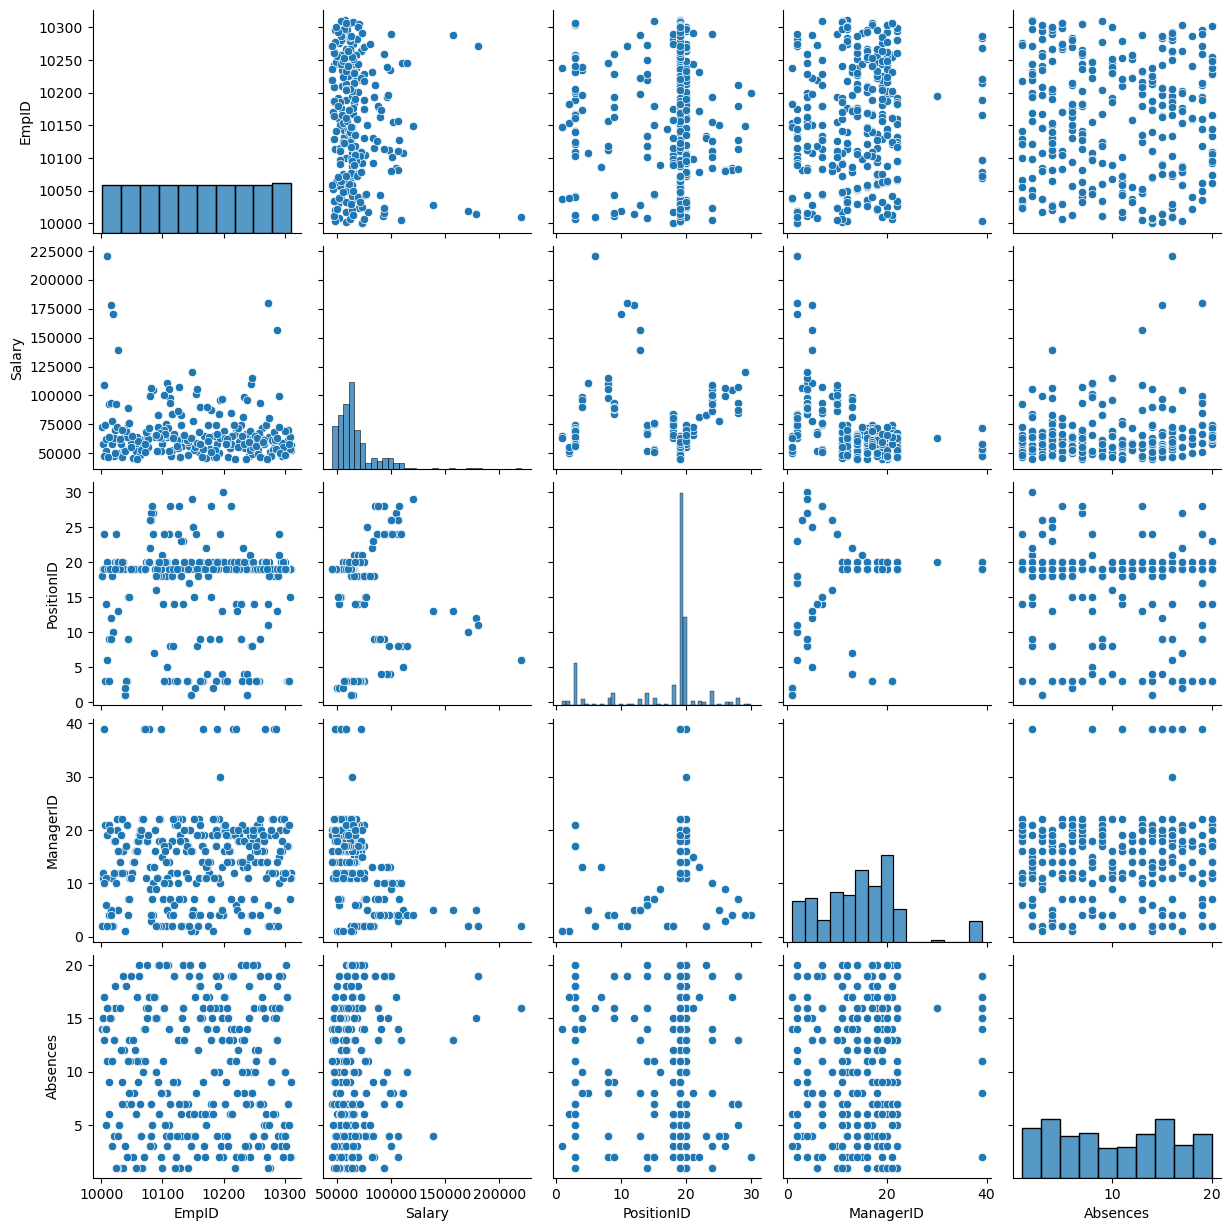

In [8]:
sns.pairplot(df)

#### Write your insghts here

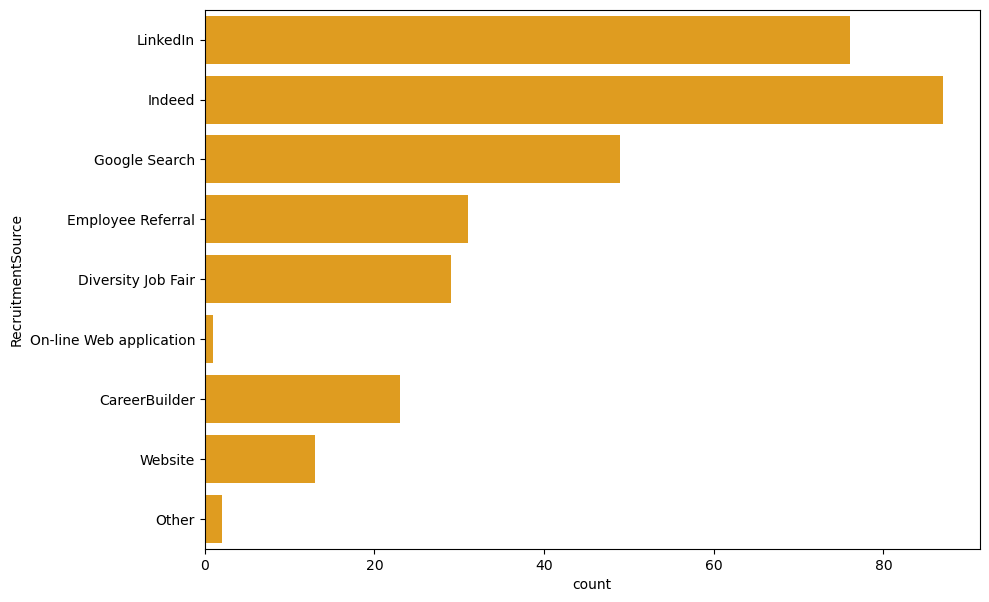

In [9]:
# View Reacuitment Source 
plt.subplots(figsize=(10,7))
sns.countplot(data=df, y= "RecruitmentSource",color='orange');

### INSIGHS:
* Top rcuirterments came from jobs sites like indeed and linkedin
* Recuirtements from websites and online applicaiton are the least hired.

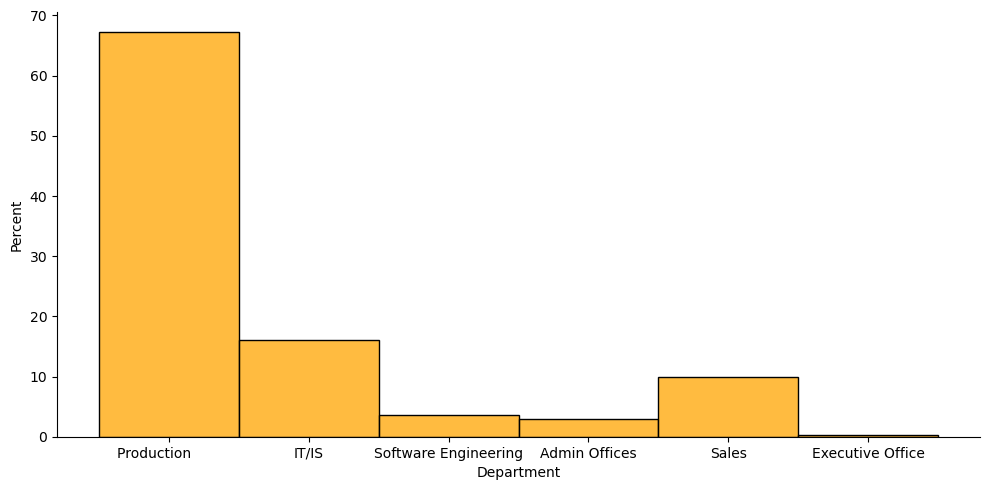

In [10]:

sns.displot(data=df, x= "Department",stat='percent',height=5,aspect=2,color='orange')

### INSIGHS:
* Most of the employees are on the pordcution department
* Almost 20% of the company are on IT/IS department

### Bivariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

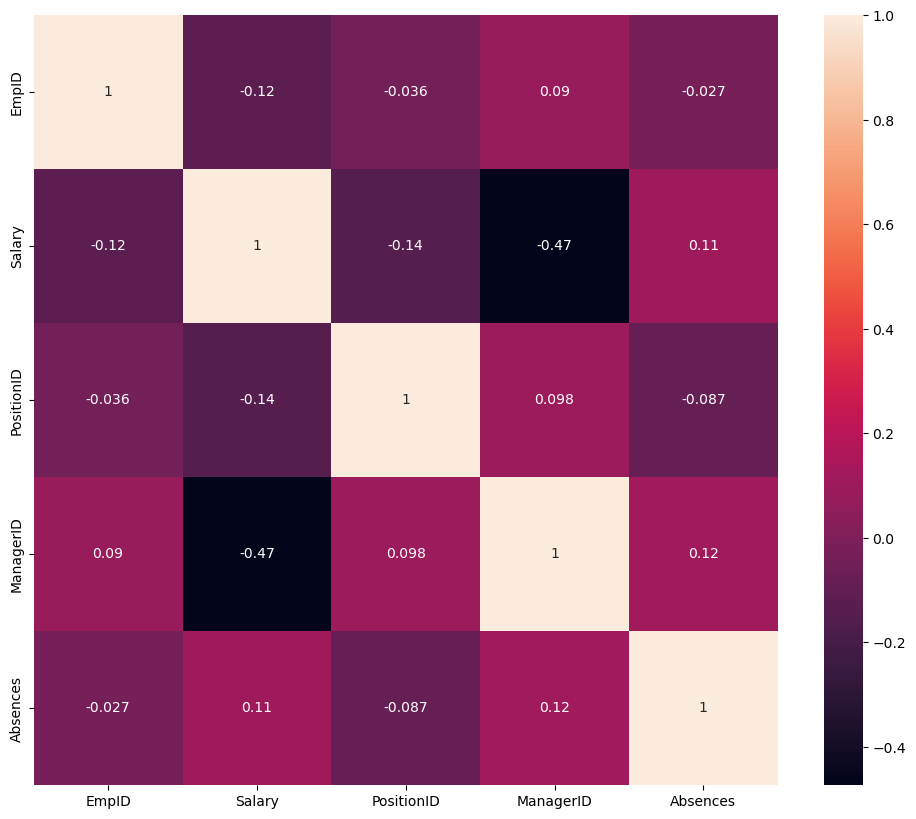

In [11]:
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),annot=True);

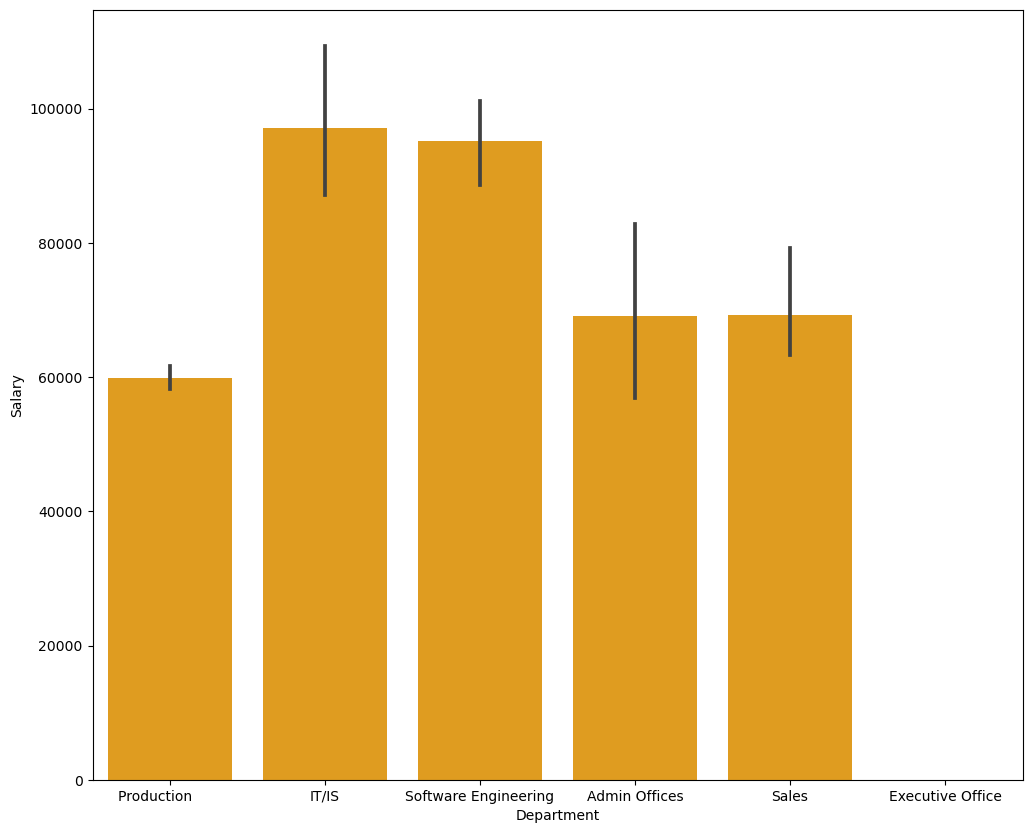

In [12]:
plt.subplots(figsize=(12,10))
sns.barplot(data=df, x="Department", y="Salary",color='orange');

### INSIGHS:
* IT and software department has the hieghst salary
* Averge Salary is almost 70K.
* Excutive salaries are unknown or there is no data

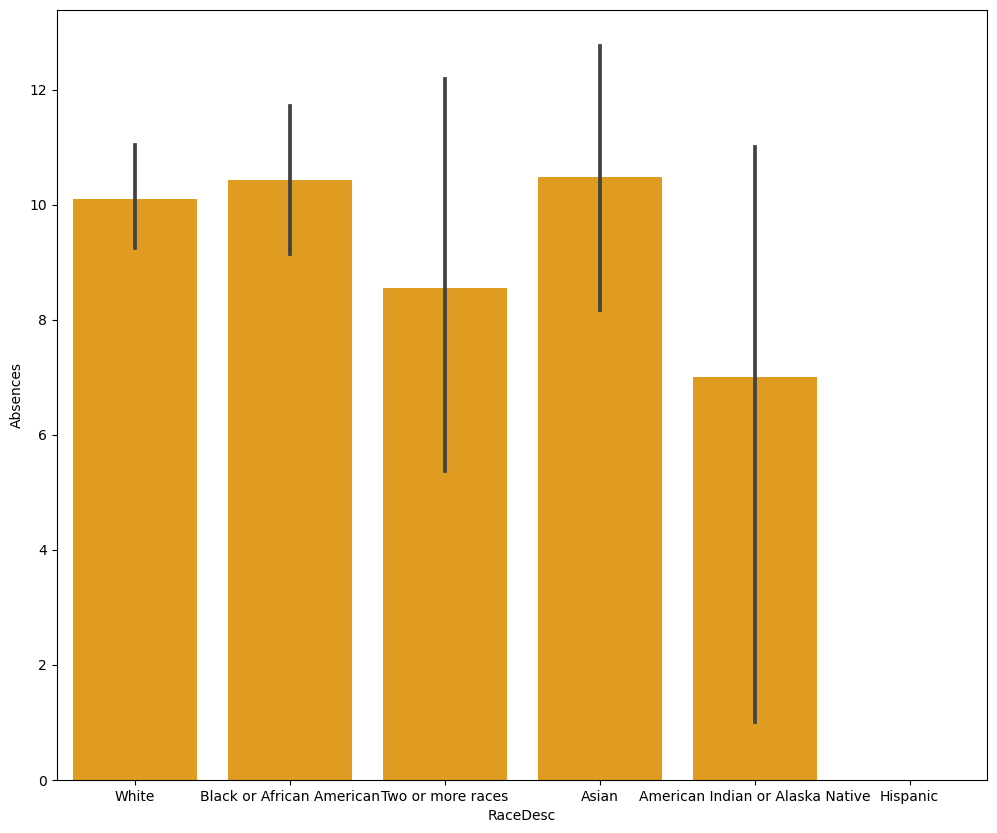

In [13]:
plt.subplots(figsize=(12,10))
sns.barplot(data=df, x="RaceDesc", y="Absences",color='orange');

#### Write your insghts here

### INSIGHS:
* American Indain or Alaska Native less likely to be absent
* Averge Absenent for all races are almost 10.

### Multivariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

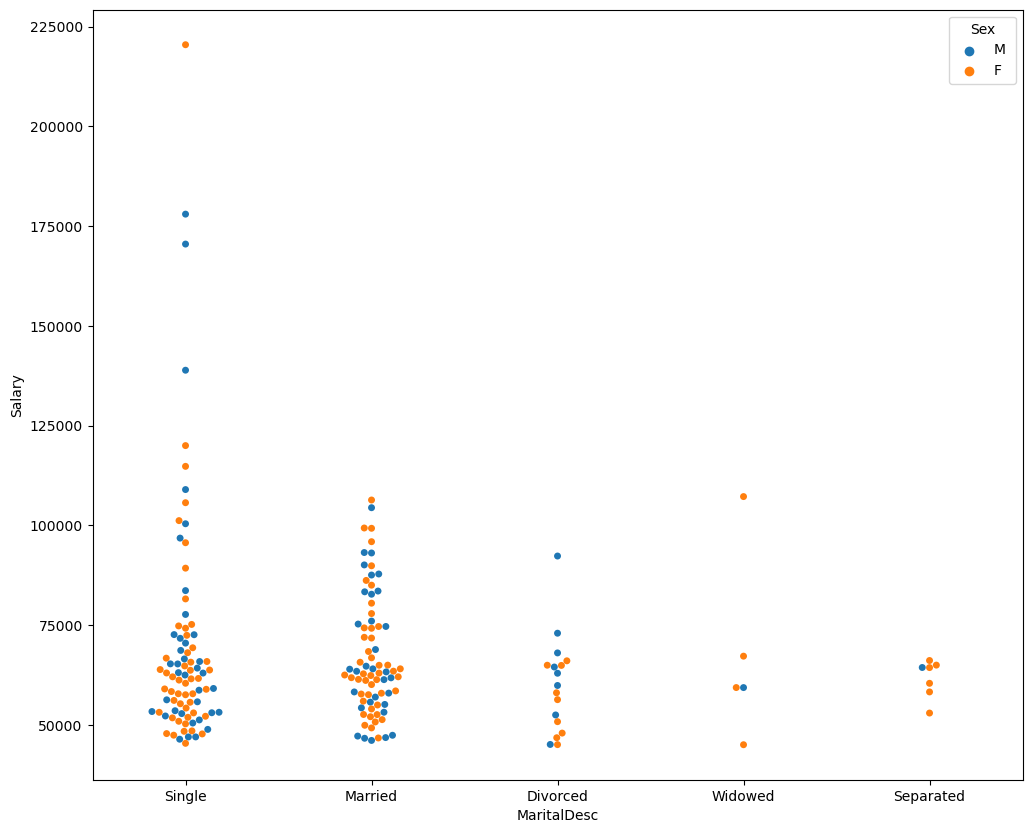

In [14]:
plt.subplots(figsize=(12,10))
sns.swarmplot(data=df, x="MaritalDesc", y="Salary", hue = 'Sex',);

### Insight
* Most of the employees are maried.
* Most of the female employee are unmarried (single or divocred or widowed or separted)

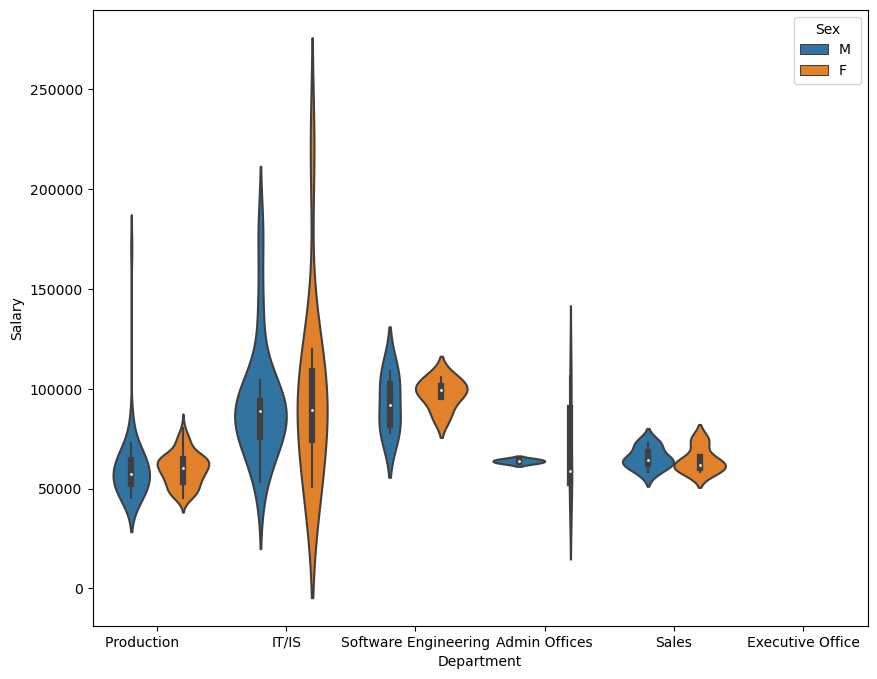

In [15]:
plt.subplots(figsize=(10,8))
sns.violinplot(data=df, x="Department", y="Salary", hue = 'Sex',);

### Insight
* Almost every department have same mean salary for female and male.
* There is outlier on IT department with female gender.
* There is variance on salary for female on Admin offices